### Statistics - Basic Introduction 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Plotting Histogram

In [2]:
versicolor_petal_length = np.array([ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
        4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
        4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
        5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
        4.2,  4.2,  4.2,  4.3,  3. ,  4.1])

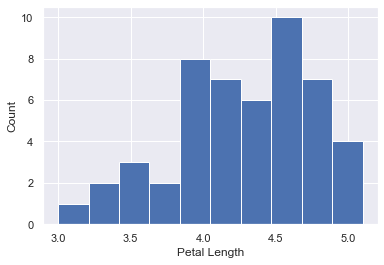

In [3]:
sns.set()
plt.hist(versicolor_petal_length)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.show()

### Number of Bins

In [4]:
bins = int(np.sqrt(len(versicolor_petal_length)))

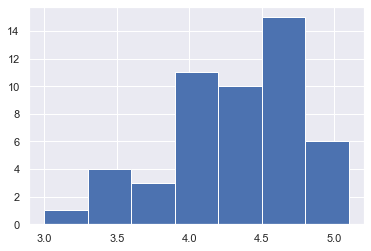

In [5]:
plt.hist(versicolor_petal_length,bins=bins)
plt.show()

### Bee Swarm Plot

In [6]:
df_iris = pd.read_csv('../Statistics/Data/iris.csv')
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


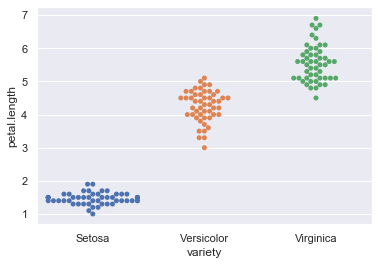

In [7]:
sns.swarmplot(x='variety',y='petal.length',data=df_iris)
plt.show()

### Computing ECDF( Empirical Cumulative Distributed Function)

In [8]:
#function to define ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

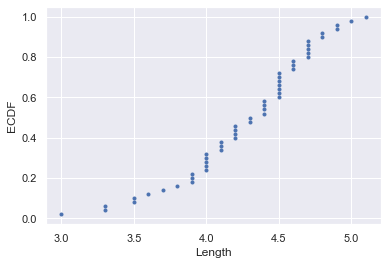

In [9]:
x_vers,y_vers = ecdf(versicolor_petal_length)
plt.plot(x_vers,y_vers,marker = '.', linestyle = 'none')
plt.xlabel('Length')
plt.ylabel('ECDF')
plt.show()

### Mean and Median

In [10]:
mean_versicolor = np.mean(versicolor_petal_length)
print(mean_versicolor)

4.26


### Percentile Calculation

In [11]:
#Calculating percentiles
percentiles = np.array([2.5,25,50,75,97.5])

calculate = np.percentile(versicolor_petal_length,percentiles)
print(calculate)

[3.3    4.     4.35   4.6    4.9775]


### Comparing Percentiles to ECDF

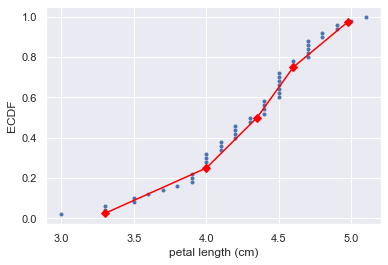

In [12]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
plt.plot(calculate,percentiles/100,marker='D',color='red')
plt.show()


### Box Plot

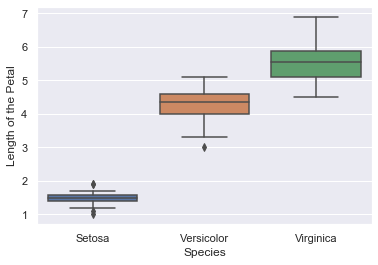

In [13]:
sns.boxplot(x='variety',y='petal.length',data=df_iris)
plt.xlabel('Species')
plt.ylabel('Length of the Petal')
plt.show()

## Compute the Variance

### Manually Calculating the Variance

<b>Steps:</b>

a. Work out the Mean (the simple average of the numbers)

b. Then for each number: subtract the Mean and square the result (the squared difference).

c. Then work out the average of those squared differences.

In [14]:
differences = np.array(versicolor_petal_length-np.mean(versicolor_petal_length))
differences_sq = differences ** 2

print('Variance-Manually generating is',np.mean(differences_sq))


Variance-Manually generating is 0.21640000000000004


### Calculate Variance using Numpy

In [15]:
np.var(versicolor_petal_length)

0.21640000000000004

### Manually Calculating the Standard Deviation

In [16]:
variance = np.var(versicolor_petal_length) #calculate variance
std_man = np.sqrt(variance) #Square root of variance
print('Calculating Variance ',std_man)


Calculating Variance  0.4651881339845203


### Standard Deviation Using Numpy

In [17]:
print('Standard Deviation using numpy',np.std(versicolor_petal_length))

Standard Deviation using numpy 0.4651881339845203


### Computing the Covariance

In [18]:
covariance = np.cov(df_iris['sepal.length'],df_iris['petal.length'])
print(covariance)

[[0.68569351 1.27431544]
 [1.27431544 3.11627785]]


### Generating Covariance matrix

In [19]:
cov_matrix = covariance[0,1]

print(cov_matrix)

1.2743154362416107


## Bernoulli trial

In [20]:
def bernouili_trial(n,p):
    
    n_success=0
    
    for i in range(n):
        random_numbers = np.random.random()
        if random_numbers<p:
            n_success=+1
            
    return n_success


print('Perform Bernouli Trial',bernouili_trial(100, 0.05))
            
        

Perform Bernouli Trial 1


## Binomial Distribution

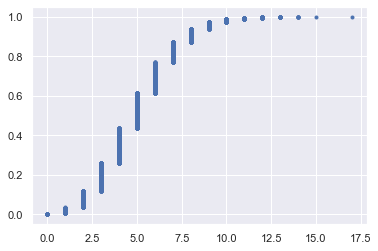

In [21]:
n_defaults = np.random.binomial(n=100,p=0.05,size=10000)

x,y = ecdf(n_defaults)  #calculate the cdf
plt.plot(x,y,marker='.',linestyle='none')
plt.show()

### Plotting the Binomial Distribution 


We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

C:\Users\subhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


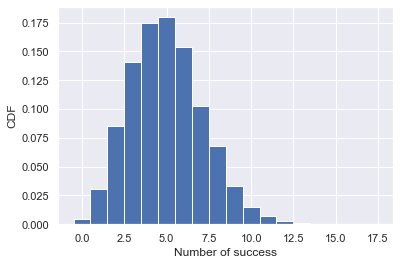

In [22]:
bins = np.arange(min(n_defaults),max(n_defaults)+1.5)-0.5
plt.hist(n_defaults,bins=bins,normed = True)
plt.xlabel('Number of success')
plt.ylabel('CDF')
plt.show()


### Relationship between Poison and Binomial

In [23]:
samples_poisson = np.random.poisson(10,size=10000)

print(' Poisson Mean:', np.mean(samples_poisson),
      '\n Poisson STD:',
                       np.std(samples_poisson))

 Poisson Mean: 10.0227 
 Poisson STD: 3.1775438171644463


In [24]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

   
    print('n =', n[i], 'Binomial Mean:', np.mean(samples_binomial),
                                 'Binomial STD',np.std(samples_binomial))


n = 20 Binomial Mean: 10.0204 Binomial STD 2.233155578995785
n = 100 Binomial Mean: 10.0147 Binomial STD 2.9873205234791933
n = 1000 Binomial Mean: 9.9749 Binomial STD 3.1220297868534184


### Normal PDF

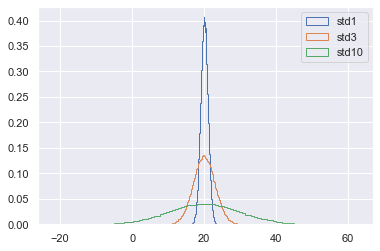

In [25]:
sns.set()
samples_1 = np.random.normal(20,1,size=100000) #Mean-20 , STD -1 
samples_3 = np.random.normal(20,3,size=100000)
samples_10 = np.random.normal(20,10,size=100000)

plt.hist(samples_1,density=True,histtype='step',bins=100)
plt.hist(samples_3,density=True,histtype='step',bins=100)
plt.hist(samples_10,density=True,histtype='step',bins=100)
plt.legend(('std1','std3','std10'))
plt.show()


### CDF using ECDF

C:\Users\subhr\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


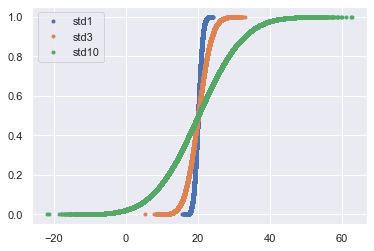

In [26]:
x_std_1,y_std_1 = ecdf(samples_1)
x_std_3,y_std_3 = ecdf(samples_3)
x_std_10,y_std_10 = ecdf(samples_10)

plt.plot(x_std_1,y_std_1,marker='.',linestyle='none')
plt.plot(x_std_3,y_std_3,marker='.',linestyle='none')
plt.plot(x_std_10,y_std_10,marker='.',linestyle='none')
plt.legend(('std1','std3','std10'))


### Note: 
    
    The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. 
The width of the CDF varies with the standard deviation.

Reference: https://learn.datacamp.com/courses/statistical-thinking-in-python-part-1